In [1]:
import sys
from pathlib import Path

# 🔹 반드시 import 전에 sys.path 조정
root_path = Path().resolve().parent.parent
if str(root_path) not in sys.path:
    sys.path.insert(0, str(root_path))

import matplotlib.pyplot as plt
import pandas as pd
from typing import Callable, Tuple
from src.smoothing.simple_exp_smoothing import ses_forecast
from src.error_metrics import error_metrics
import matplotlib.dates as mdates
from src.charts import chart
    
def load_time_series_from_csv(
    file_path: str,
    skiprows: range,
    nrows: int,
    time_col: str = 'msur_dt',
    value_col: str = 'inflow_flux_tot',
    freq: str = 'min'
) -> pd.Series:
    df = pd.read_csv(file_path, skiprows=skiprows, nrows=nrows)
    df[time_col] = pd.to_datetime(df[time_col])
    return pd.Series(df[value_col].values, index=pd.DatetimeIndex(df[time_col], freq=freq))





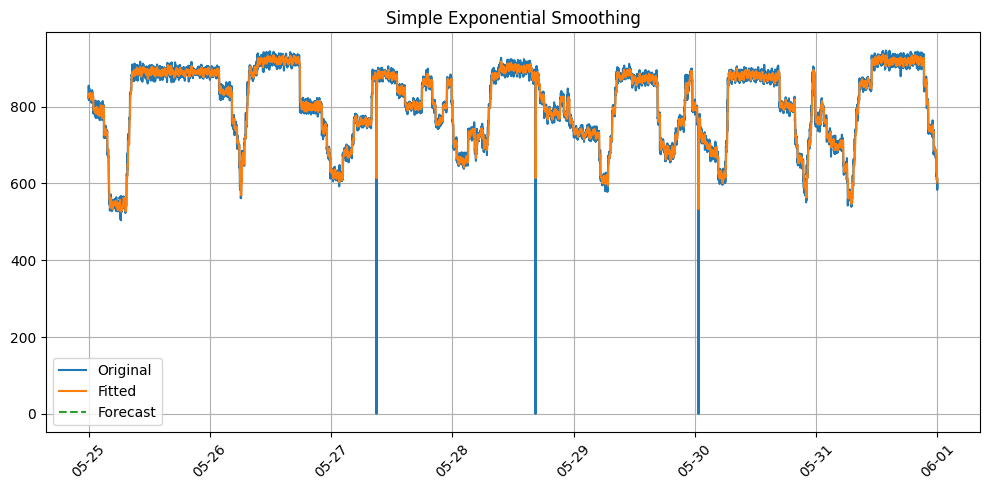

forecast :  2025-06-01 00:00:00    600.823689
2025-06-01 00:01:00    600.823689
2025-06-01 00:02:00    600.823689
Freq: min, dtype: float64
SSE: 3963654.542840992
MSE: 393.21969671041586
RMSE: 19.829767943937615
MAE: 8.745395626690186
MAPE: inf
SMAPE: 1.14538145117541


In [2]:
file_path = r'D:\dev\modules\pt_eh_inflow_data.csv'
series = load_time_series_from_csv(
    file_path=r'D:\dev\modules\pt_eh_inflow_data.csv',
    skiprows=range(1, 14401 + (1440 * 7) * 2),
    nrows=1440 * 7,
    time_col='msur_dt',
    value_col='inflow_flux_tot',
    freq='min'
)

# 2. SES 모델 수행
fitted, forecast = ses_forecast(
    series=series,
    smoothing_level=0.3,
    forecast_periods=3
)

# 3. 결과 시각화
chart.plot_ses_results(
    series=series,
    fitted=fitted,
    forecast=forecast,
    title='Simple Exponential Smoothing'
)


metrics = error_metrics.error_metrics_all(
    y_true=series,
    y_pred=fitted
)

print('forecast : ', forecast)

for k, v in metrics.items():
    print(f"{k}: {v}")



